<a href="https://colab.research.google.com/github/lisphilar/covid19-sir/blob/master/01_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation
The first step of data science is data preparation. `covsirphy` has the following three functionality for that.

1. Downloading datasets from recommended data servers
2. Reading `pandas.DataFrame`
3. Generator of sample data with SIR-derived ODE model

In [79]:
from pprint import pprint
import pandas as pd
try:
    import covsirphy as cs
except ImportError:
    !pip install --upgrade "git+https://github.com/lisphilar/covid19-sir.git#egg=covsirphy" -q
    import covsirphy as cs
cs.__version__

'2.24.0-xi'

## 1. Downloading datasets from recommended data 
We will download datasets from the following recommended data servers.

- **COVID-19 Data Hub, https://covid19datahub.io/**
    - Guidotti, E., Ardia, D., (2020), “COVID-19 Data Hub”, Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
    - The number of cases (JHU style)
    - Population values in each country/province
    - [Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker)
    - The number of tests
- **Our World In Data, https://github.com/owid/covid-19-data/tree/master/public/data**
    - Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https://doi.org/10.1038/s41597-020-00688-8
    - The number of tests
    - The number of vaccinations
    - The number of people who received vaccinations
- **COVID-19 Open Data by Google Cloud Platform, https://github.com/GoogleCloudPlatform/covid-19-open-data**
    - O. Wahltinez and others (2020), COVID-19 Open-Data: curating a fine-grained, global-scale data repository for SARS-CoV-2, Work in progress, https://goo.gle/covid-19-open-data
    - percentage to baseline in visits
    - Note: Please refer to [Google Terms of Service](https://policies.google.com/terms) in advance.
- **World Bank Open Data, https://data.worldbank.org/**
    - World Bank Group (2020), World Bank Open Data, https://data.worldbank.org/
    - Population pyramid
- **Datasets for CovsirPhy, https://github.com/lisphilar/covid19-sir/tree/master/data**
    - Hirokazu Takaya (2020-2022), GitHub repository, COVID-19 dataset in Japan, https://github.com/lisphilar/covid19-sir/tree/master/data.
    - The number of cases in Japan (total/prefectures)
    - Metadata regarding Japan prefectures

***

How to request new data loader:  
If you want to use a new dataset for your analysis, please kindly inform us using [GitHub Issues: Request new method of DataLoader class](https://github.com/lisphilar/covid19-sir/issues/new/?template=request-new-method-of-dataloader-class.md). Please read [Guideline of contribution](https://lisphilar.github.io/covid19-sir/CONTRIBUTING.html) in advance.

### 1-1. With `DataEngineer` class
We can use `DataEngineer().download()` for data downloading from recommended data servers as the quickest way.

In [80]:
eng = cs.DataEngineer()
eng.download();

We can get the all downloaded records as a `pandas.DataFrame` with `DataEngineer().all()` method.

In [81]:
all_df = eng.all()
# Overview of the records
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208666 entries, 0 to 208665
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ISO3                                 208666 non-null  category      
 1   Province                             208666 non-null  category      
 2   City                                 208666 non-null  category      
 3   Date                                 208666 non-null  datetime64[ns]
 4   Cancel_events                        165469 non-null  object        
 5   Confirmed                            189232 non-null  object        
 6   Contact_tracing                      165402 non-null  object        
 7   Country                              206130 non-null  string        
 8   Fatal                                172850 non-null  object        
 9   Gatherings_restrictions              165465 non-null  object        
 

`DataEngineer.citations()` shows citations of the datasets.

In [82]:
print("\n".join(eng.citations()))

Hirokazu Takaya (2020-2022), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https: //doi.org/10.1038/s41597-020-00688-8
O. Wahltinez and others (2020), COVID-19 Open-Data: curating a fine-grained, global-scale data repository for SARS-CoV-2,  Work in progress, https://goo.gle/covid-19-open-data


Note that, as default, `DataEngineer().download()` collects country-level data and save the datasets as CSV files in "input" (=`directory` argument of `DataEngineer()`) folder of the current directory. If the last modification time of the saved CSV files is within the last 12 (=`update_interval` argument of `DataEngineer()`) hours, the saved CSV files will be used as the database.

For some countries (eg. Japan), province/state/prefecture level data is available and we can download it as follows.

In [83]:
eng_jpn = cs.DataEngineer()
eng_jpn.download(country="Japan")
eng_jpn.all().head()

,ISO3,Province,City,Date,Cancel_events,Confirmed,Contact_tracing,Country,Fatal,Gatherings_restrictions,...,Stay_home_restrictions,Stringency_index,Testing_policy,Tests,Transport_closing,Vaccinated_full,Vaccinated_once,Vaccinations,Vaccinations_boosters,Workplace_closing
0,JPN,,-,2022-07-08,1.0,9600500,1.0,Japan,31407,1.0,...,1.0,39.81,1.0,57334504.0,0.0,None,None,None,None,-1.0
1,JPN,,-,2022-07-09,1.0,9655506,1.0,Japan,31419,1.0,...,1.0,39.81,1.0,57500141.0,0.0,None,None,None,None,-1.0
2,JPN,,-,2022-07-10,1.0,9709563,1.0,Japan,31431,1.0,...,1.0,39.81,1.0,57596231.0,0.0,None,None,None,None,-1.0
3,JPN,,-,2022-07-11,1.0,9746692,1.0,Japan,31446,1.0,...,1.0,39.81,1.0,57650533.0,0.0,None,None,None,None,-1.0
4,JPN,,-,2022-07-12,1.0,9822689,1.0,Japan,31469,1.0,...,1.0,39.81,1.0,57797816.0,0.0,None,None,None,None,-1.0


For some countries (eg. USA), city-level data is available and we can download it as follows.

In [84]:
eng_alabama = cs.DataEngineer()
eng_alabama.download(country="USA", province="Alabama")
eng_alabama.all().head()

,ISO3,Province,City,Date,Cancel_events,Confirmed,Contact_tracing,Country,Fatal,Gatherings_restrictions,...,Mobility_workplaces,Population,Recovered,School_closing,Stay_home_restrictions,Stringency_index,Testing_policy,Tests,Transport_closing,Workplace_closing
0,USA,Alabama,Autauga,2020-03-24,-2.0,1.0,1.0,United States,0.0,-4.0,...,<NA>,55869.0,<NA>,3.0,-2.0,-68.98,2.0,<NA>,-1.0,-3.0
1,USA,Alabama,Autauga,2020-03-25,-2.0,4.0,1.0,United States,0.0,-4.0,...,<NA>,55869.0,<NA>,3.0,-2.0,-68.98,2.0,<NA>,-1.0,-3.0
2,USA,Alabama,Autauga,2020-03-26,-2.0,6.0,1.0,United States,0.0,-4.0,...,<NA>,55869.0,<NA>,3.0,-2.0,-68.98,2.0,<NA>,-1.0,-3.0
3,USA,Alabama,Autauga,2020-03-27,-2.0,6.0,1.0,United States,0.0,-4.0,...,<NA>,55869.0,<NA>,3.0,-2.0,-68.98,2.0,<NA>,-1.0,-3.0
4,USA,Alabama,Autauga,2020-03-28,2.0,6.0,1.0,United States,0.0,-4.0,...,<NA>,55869.0,<NA>,3.0,-2.0,-73.61,2.0,<NA>,-1.0,3.0


### 1-2. With `DataDownloader` class
`DataEngineer` class is suggested because it has data cleaning methods and so on, but we can use `DataDownloader` class for data downloading.

In [85]:
dl = cs.DataDownloader()
dl_df = dl.layer(country=None, province=None)

In [86]:
# Overview of the records
dl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208666 entries, 0 to 208665
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ISO3                                 208666 non-null  string        
 1   Province                             208666 non-null  string        
 2   City                                 208666 non-null  string        
 3   Date                                 208666 non-null  datetime64[ns]
 4   Cancel_events                        165469 non-null  Float64       
 5   Confirmed                            189232 non-null  Float64       
 6   Contact_tracing                      165402 non-null  Float64       
 7   Country                              206130 non-null  string        
 8   Fatal                                172850 non-null  Float64       
 9   Gatherings_restrictions              165465 non-null  Float64       
 

Note that ISO3/Province/City columns have string data instead of categorical data.

In [87]:
# Citations
print("\n".join(dl.citations()))

Hirokazu Takaya (2020-2022), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan
Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https: //doi.org/10.1038/s41597-020-00688-8
O. Wahltinez and others (2020), COVID-19 Open-Data: curating a fine-grained, global-scale data repository for SARS-CoV-2,  Work in progress, https://goo.gle/covid-19-open-data


## 2. Reading `pandas.DataFrame`
We may need to use our own datasets for analysis because the dataset is not included in the recommended data servers. `DataEngineer().register()` registers new datasets of `pandas.DataFrame` format.

At first, we will prepare the new dataset as `pandas.DataFrame`. Just as a demonstration, we use [COVID-19 dataset in Japan](https://github.com/lisphilar/covid19-sir/tree/master/data). (Note that this is included in the recommended servers and the following is usually un-necessary.)

Hirokazu Takaya (2020-2022), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

Country-level data:

In [88]:
c_url = "https://raw.githubusercontent.com/lisphilar/covid19-sir/master/data/japan/covid_jpn_total.csv"
c_df = pd.read_csv(c_url, dayfirst=False)
# Check columns of the pandas.DataFrame
c_df.tail()

,Date,Location,Positive,Tested,Symptomatic,Asymptomatic,Sym-unknown,Hosp_require,Hosp_mild,Hosp_severe,Hosp_unknown,Hosp_waiting,Discharged,Fatal,Vaccinated_1st,Vaccinated_2nd,Vaccinated_3rd
2654,2022-07-22,Airport,20323,2321541.0,NaN,NaN,NaN,259.0,NaN,0,NaN,NaN,20056,8,0.0,0.0,0.0
2655,2022-07-22,Returnee,15,829.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,15,0,0.0,0.0,0.0
2656,2022-07-23,Domestic,10961440,58061426.0,NaN,NaN,NaN,1015905.0,NaN,203,NaN,NaN,9844331,31791,0.0,0.0,0.0
2657,2022-07-23,Airport,20347,2322153.0,NaN,NaN,NaN,249.0,NaN,0,NaN,NaN,20090,8,0.0,0.0,0.0
2658,2022-07-23,Returnee,15,829.0,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,15,0,0.0,0.0,0.0


Prefecture-level data:

In [89]:
p_url = "https://raw.githubusercontent.com/lisphilar/covid19-sir/master/data/japan/covid_jpn_prefecture.csv"
p_df = pd.read_csv(p_url, dayfirst=False)
# Check columns of the pandas.DataFrame
p_df.tail()

,Date,Prefecture,Positive,Tested,Discharged,Fatal,Hosp_require,Hosp_severe
40274,2022-07-22,Kumamoto,154729,348863.0,134586.0,336.0,19807.0,5.0
40275,2022-07-22,Oita,76588,678048.0,66256.0,176.0,10156.0,0.0
40276,2022-07-22,Miyazaki,73991,201123.0,64450.0,153.0,9275.0,1.0
40277,2022-07-22,Kagoshima,121280,493762.0,103311.0,219.0,14934.0,1.0
40278,2022-07-22,Okinawa,315022,1000767.0,281561.0,500.0,32878.0,18.0


We may create a `DataEngineer` instance, specifying the layer of location names. However, there is a discrepancy of layer names. `c_df` had "Location" layer and `p_df` had "Prefecture" layer. 

In [90]:
print(c_df.columns)
print(p_df.columns)

Index(['Date', 'Location', 'Positive', 'Tested', 'Symptomatic', 'Asymptomatic',
       'Sym-unknown', 'Hosp_require', 'Hosp_mild', 'Hosp_severe',
       'Hosp_unknown', 'Hosp_waiting', 'Discharged', 'Fatal', 'Vaccinated_1st',
       'Vaccinated_2nd', 'Vaccinated_3rd'],
      dtype='object')
Index(['Date', 'Prefecture', 'Positive', 'Tested', 'Discharged', 'Fatal',
       'Hosp_require', 'Hosp_severe'],
      dtype='object')


In [91]:
print(c_df.Location.unique())

['Domestic' 'Returnee' 'Airport']


To make country-level dataset, calculate total values of Domestic/Returneee/Airport.

In [92]:
country_df = c_df.groupby("Date").sum().reset_index()
country_df.insert(1, "Country", "Japan")
country_df.insert(2, "Prefecture", pd.NA)
country_df.tail()

,Date,Country,Prefecture,Positive,Tested,Symptomatic,Asymptomatic,Sym-unknown,Hosp_require,Hosp_mild,Hosp_severe,Hosp_unknown,Hosp_waiting,Discharged,Fatal,Vaccinated_1st,Vaccinated_2nd,Vaccinated_3rd
889,2022-07-19,Japan,<NA>,10388078,59120917.0,0.0,0.0,0.0,712611.0,0.0,155,0.0,0.0,9593626,31610,2568.0,0.0,78911788.0
890,2022-07-20,Japan,<NA>,10469440,59345447.0,0.0,0.0,0.0,725898.0,0.0,176,0.0,0.0,9659932,31643,2815.0,0.0,78943841.0
891,2022-07-21,Japan,<NA>,10604679,59756095.0,0.0,0.0,0.0,797450.0,0.0,189,0.0,0.0,9732623,31697,1284.0,0.0,79005135.0
892,2022-07-22,Japan,<NA>,10785505,60065262.0,0.0,0.0,0.0,909261.0,0.0,191,0.0,0.0,9787072,31735,0.0,0.0,79063503.0
893,2022-07-23,Japan,<NA>,10981802,60384408.0,0.0,0.0,0.0,1016154.0,0.0,203,0.0,0.0,9864436,31799,0.0,0.0,0.0


To make prefecture-level data, add "Country" column.

In [93]:
prefecture_df = p_df.copy()
prefecture_df.insert(1, "Country", "Japan")
prefecture_df.tail()

,Date,Country,Prefecture,Positive,Tested,Discharged,Fatal,Hosp_require,Hosp_severe
40274,2022-07-22,Japan,Kumamoto,154729,348863.0,134586.0,336.0,19807.0,5.0
40275,2022-07-22,Japan,Oita,76588,678048.0,66256.0,176.0,10156.0,0.0
40276,2022-07-22,Japan,Miyazaki,73991,201123.0,64450.0,153.0,9275.0,1.0
40277,2022-07-22,Japan,Kagoshima,121280,493762.0,103311.0,219.0,14934.0,1.0
40278,2022-07-22,Japan,Okinawa,315022,1000767.0,281561.0,500.0,32878.0,18.0


Create `DataEngineer` instance and register datasets.

In [94]:
# Set layers and specify layer name of country (which will be converted to ISO3 code for standarization)
eng_own = cs.DataEngineer(layers=["Country", "Prefecture"], country="Country")
# Country-level data
eng_own.register(data=country_df, citations="New country-level data", dayfirst=False)
# Prefecture-level data
eng_own.register(data=prefecture_df, citations="New prefecture-level data", dayfirst=False)
# Show data
display(eng_own.all().tail())
# Show citations
print("\n".join(eng_own.citations()))

,Country,Prefecture,Date,Asymptomatic,Discharged,Fatal,Hosp_mild,Hosp_require,Hosp_severe,Hosp_unknown,Hosp_waiting,Positive,Sym-unknown,Symptomatic,Tested,Vaccinated_1st,Vaccinated_2nd,Vaccinated_3rd
41168,JPN,Yamanashi,2022-07-18,<NA>,35124,68,<NA>,2006,0,<NA>,<NA>,37188,<NA>,<NA>,389640,<NA>,<NA>,<NA>
41169,JPN,Yamanashi,2022-07-19,<NA>,35907,69,<NA>,2818,0,<NA>,<NA>,38770,<NA>,<NA>,389640,<NA>,<NA>,<NA>
41170,JPN,Yamanashi,2022-07-20,<NA>,36122,69,<NA>,2862,0,<NA>,<NA>,39031,<NA>,<NA>,389640,<NA>,<NA>,<NA>
41171,JPN,Yamanashi,2022-07-21,<NA>,36417,69,<NA>,3581,0,<NA>,<NA>,40046,<NA>,<NA>,389640,<NA>,<NA>,<NA>
41172,JPN,Yamanashi,2022-07-22,<NA>,36772,69,<NA>,4250,0,<NA>,<NA>,41073,<NA>,<NA>,401267,<NA>,<NA>,<NA>


New country-level data
New prefecture-level data


## 3. Generator of sample data with SIR-derived ODE model
CovsirPhy can generate sample data with subclasses of `ODEModel` and `Dynamics` class. Refer to the followings.

### 3.1 Sample data of one-phase ODE model
Regarding ODE models, please refert to **[TBC]**. Here, we will create a sample data with one-phase SIR model and tau value 1440 min, the first date 01Jan2022, the last date 30Jun2022. ODE parameter values are preset.

In [95]:
# Create solver with preset
model = cs.SIRModel.from_sample(date_range=("01Jan2022", "30Jun2022"), tau=1440)
# Show settings
pprint(model.settings())

{'date_range': ('01Jan2022', '30Jun2022'),
 'initial_dict': {'Fatal or Recovered': 0,
                  'Infected': 1000,
                  'Susceptible': 999000},
 'param_dict': {'rho': 0.2, 'sigma': 0.075},
 'tau': 1440}


Solve the ODE model with `ODEModel().solve()` method.

In [96]:
one_df = model.solve()
display(one_df.head())
display(one_df.tail())

,Susceptible,Infected,Fatal or Recovered
Date,,,
2022-01-01,999000,1000,0
2022-01-02,998787,1133,80
2022-01-03,998546,1283,170
2022-01-04,998273,1454,273
2022-01-05,997964,1647,389


,Susceptible,Infected,Fatal or Recovered
Date,,,
2022-06-26,88354,750,910895
2022-06-27,88342,708,910950
2022-06-28,88329,669,911002
2022-06-29,88318,632,911050
2022-06-30,88307,596,911096


Plot the time-series data.

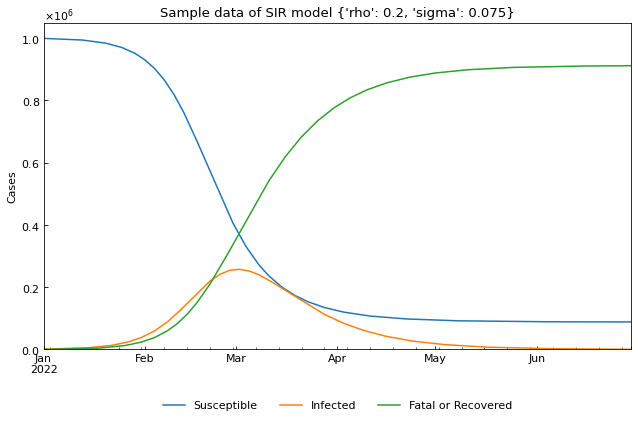

In [97]:
cs.line_plot(one_df, title=f"Sample data of SIR model {model.settings()['param_dict']}")

### 3.2 Sample data of multi-phase ODE model
Regarding multi-phase ODE models, please refert to **[TBC]**. Here, we will create a sample data with two-phase SIR model and tau value 1440 min, the first date 01Jan2022, the last date 30Jun2022.

The 0th phase: 01Jan2022 - 28Feb2022, rho=0.2, sigma=0.075 (preset)  
The 1st phase: 01Mar2022 - 30Jun2022, **rho=0.4**, sigma=0.075

We will use `Dynamics` class. At first, set the first/date of dynamics and set th 0th phase ODE parameters.

In [98]:
dyn = cs.Dynamics.from_sample(model=cs.SIRModel, date_range=("01Jan2022", "30Jun2022"))
# Show summary
dyn.summary()

,Start,End,Rt,rho,sigma,1/beta [day],1/gamma [day]
Phase,,,,,,,
0th,2022-01-01,2022-06-30,2.67,0.2,0.075,5,13


Add the 1st phase with `Dynamics.register()` method.

In [99]:
setting_df = dyn.register()
setting_df.loc["01Mar2022": "30Jun2022", ["rho", "sigma"]] = [0.4, 0.075]
setting_df

,Susceptible,Infected,Fatal,Recovered,rho,sigma
Date,,,,,,
2022-01-01,999000,1000,0,0,0.2,0.075
2022-01-02,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2022-01-03,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2022-01-04,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2022-01-05,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...
2022-06-26,<NA>,<NA>,<NA>,<NA>,0.4,0.075
2022-06-27,<NA>,<NA>,<NA>,<NA>,0.4,0.075
2022-06-28,<NA>,<NA>,<NA>,<NA>,0.4,0.075


In [100]:
dyn.register(data=setting_df)
# Show summary
dyn.summary()

,Start,End,Rt,rho,sigma,1/beta [day],1/gamma [day]
Phase,,,,,,,
0th,2022-01-01,2022-02-28,2.67,0.2,0.075,5,13
1st,2022-03-01,2022-06-30,5.33,0.4,0.075,2,13


Solve the ODE model with `Dynamics().simulate()` method and plot the time-series data.

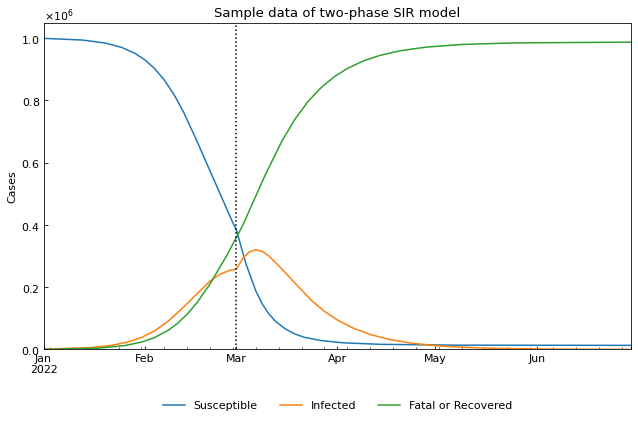

In [101]:
two_df = dyn.simulate(model_specific=True)
cs.line_plot(two_df, title=f"Sample data of two-phase SIR model", v=["01Mar2022"])

When we need convert model-specific variables to model-free variables (Susceptible/Infected/Fatal/Recovered), we will set `model_specific=False` (default).
Because R="Fatal or Recovered" in SIR model, we assume that R="Recovered" and F = 0.

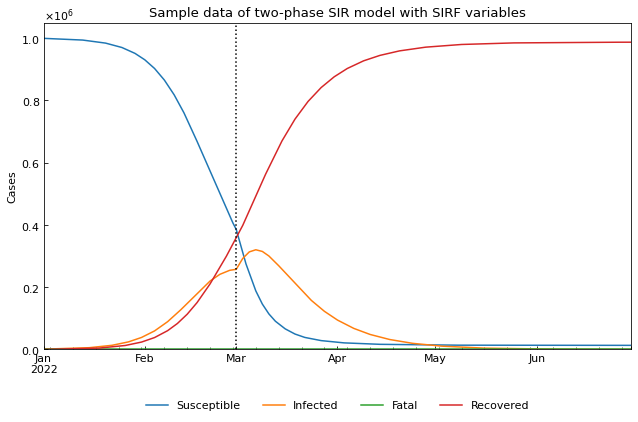

In [102]:
two_df = dyn.simulate(model_specific=False)
cs.line_plot(two_df, title=f"Sample data of two-phase SIR model with SIRF variables", v=["01Mar2022"])

Actually, observable varialbles are Population/Confirmed/Infected/Recovered. We can calculate Population and Confirmed as follows.

- Confirmed = Infected + Fatal + Recovered
- Population = Susceptible + Confirmed

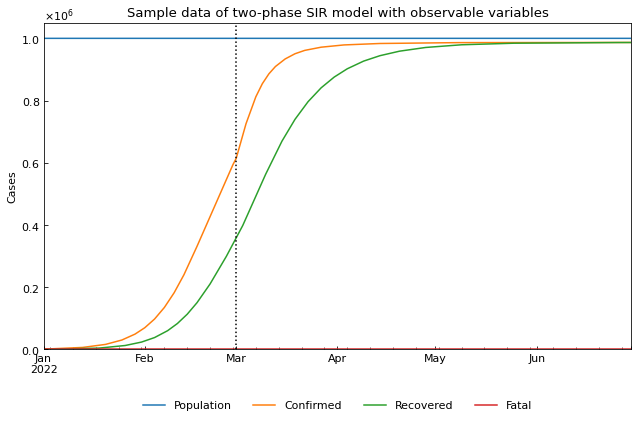

In [103]:
real_df = two_df.copy()
real_df["Confirmed"] = real_df[["Infected", "Fatal", "Recovered"]].sum(axis=1)
real_df["Population"] = real_df[["Susceptible", "Confirmed"]].sum(axis=1)
real_df = real_df.loc[:, ["Population", "Confirmed", "Recovered", "Fatal"]]
cs.line_plot(real_df, title=f"Sample data of two-phase SIR model with observable variables", v=["01Mar2022"])

Thank you!